# Redução de dimensionalidade

Ou seja, aprender a diminuir o número de entradas para os modelos de machine learning, e assim utilizar menos poder computacional.


O modelo principal usado neste notebook é PCA (**principal component anaylis / análise dos componentes principais**), um outro modelo similar é o (**truncated SVD / truncated singular value decomposition** - decomposição truncada de valores singulares).

## Reduzindo dimensionalidades com PCA

Hora de levar a matemática para um outro nível, utilizando algebra linear para reduzir as dimensões.

Há muitos outros métodos de decomposição, que veremos em outros notebooks.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
iris =  datasets.load_iris()
iris_X = iris.data
y = iris.target

## Como fazer

1. Importar o módulo de decomposiçao

In [3]:
from sklearn import decomposition

2. instanciar o objeto padrão PCA

In [4]:
pca = decomposition.PCA()
pca

PCA()

3. transformar o dados utilizando o método `fit_transform`

In [5]:
iris_pca = pca.fit_transform(iris_X)
iris_pca[:5]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02]])

4. Agora que o objeto PCA foi ajustado, use o `explained_variance_ratio`.

In [6]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [ ]:
pca.explained_variance_ratio_.sum()

## Como funciona

O PCA encontra o conjunto de vectores ortogonais que representam os dados da matriz original. O PCA trabalha em mapear o conjunto de dados original em novos espações vetoriais, onde os novos vetores das colunas da matriz são ortogonais.

Conjunto de dados de grandes dimensões podem se tornar um problema,  podem sobreajustar valores, por isso é preferível utilizar menos dimensões.

In [7]:
pca = decomposition.PCA(n_components=2)
iris_X_prime = pca.fit_transform(iris_X)
iris_X_prime.shape

(150, 2)

In [8]:
iris_pca.shape

(150, 4)

A matriz agora é de Nx2 ao ínves de Nx4.

In [9]:
pca.explained_variance_ratio_.sum()

0.977685206318795

Para visualizar o que o PCA fez, plotar  as duas dimensões de conjunto de dados do "iris" com o figuras antes-depois da transformação.

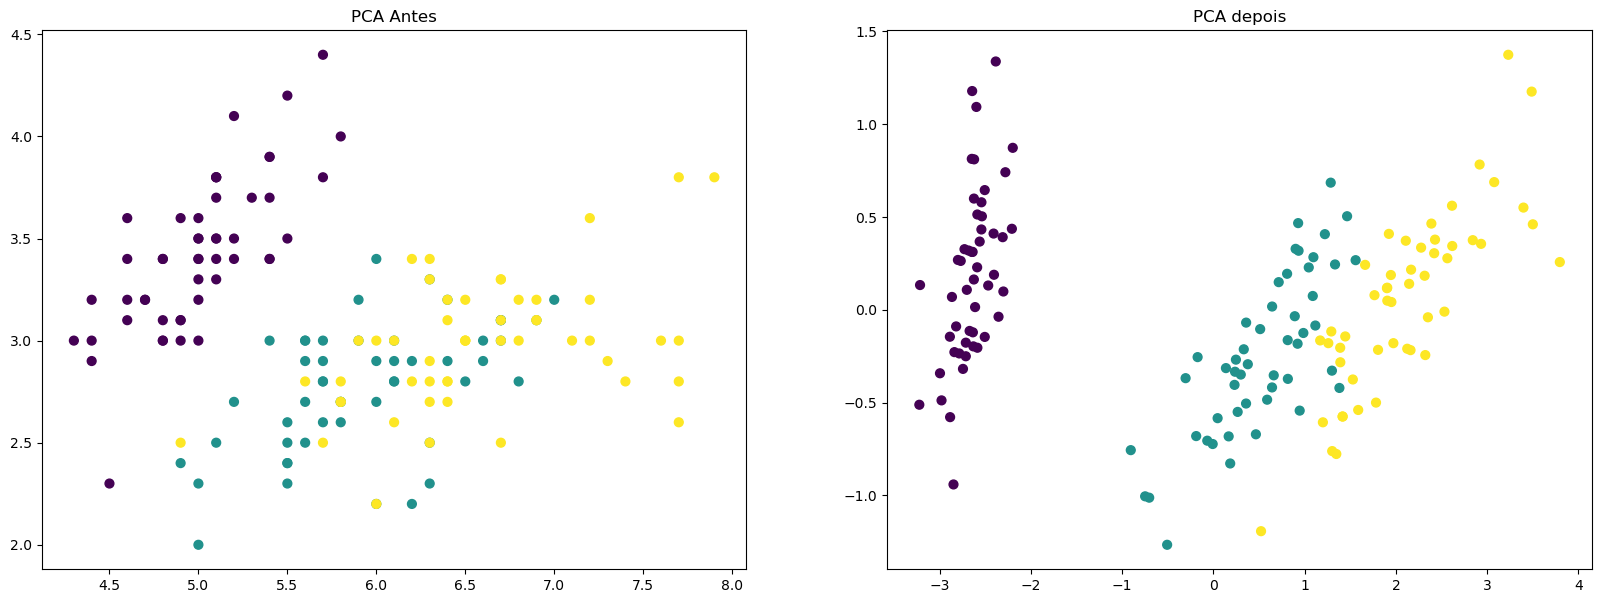

In [11]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_X[: ,0], iris_X[:,1], c=y, s=40)
ax.set_title("PCA Antes")

ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_prime[:,0], iris_X_prime[:,1], c=y , s=40)
ax2.set_title("PCA depois")
plt.show()

Parar explicar pelo menos 98 percento do desvio, o objeto PCA será criado da seguinte forma:

In [12]:
pca = decomposition.PCA(n_components=.98)
iris_x_prime = pca.fit(iris_X).transform(iris_X)
pca.explained_variance_ratio_.sum()

0.9947878161267247

## Há mais

É recomendado que o PCA seja escalonado previamente, da seguinte forma:

In [13]:
from sklearn import preprocessing

In [14]:
iris_X_scaled = preprocessing.scale(iris_X)
pca = decomposition.PCA(n_components=2)
iris_X_scaled = pca.fit_transform(iris_X_scaled)

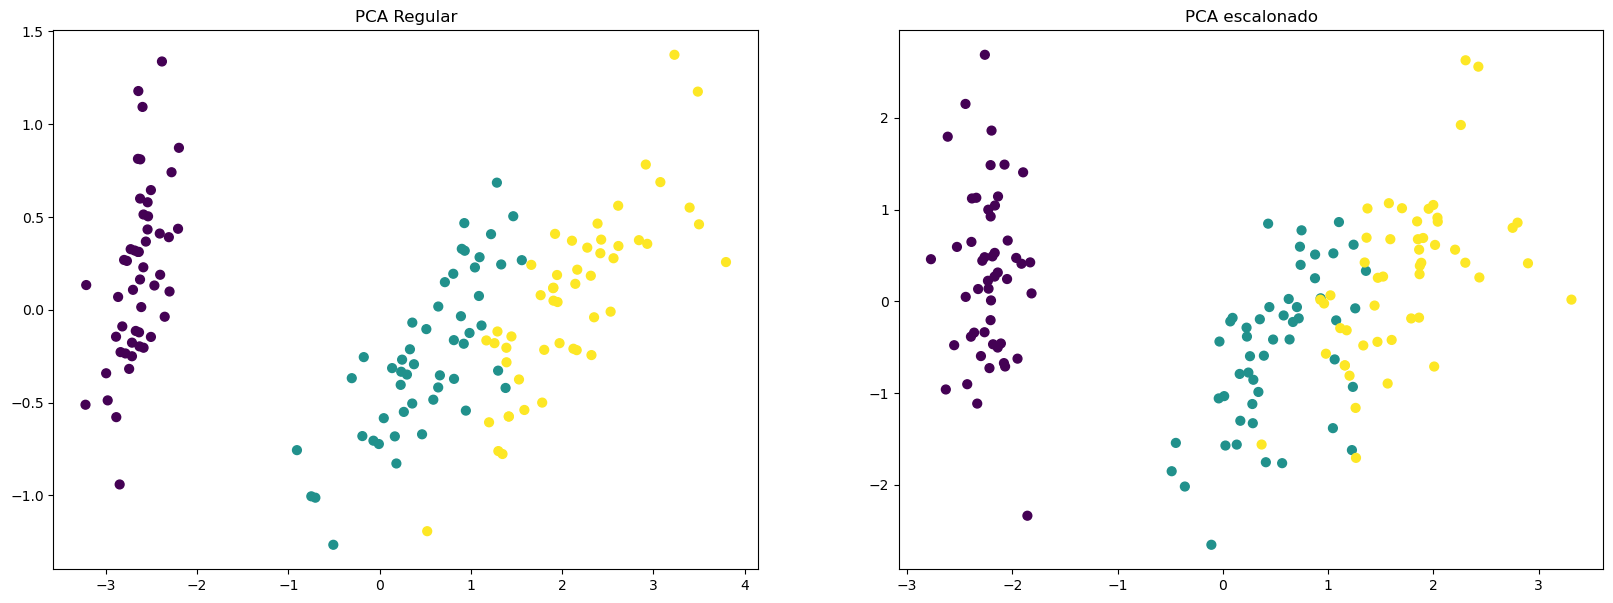

In [16]:
# gráfico
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_X_prime[:,0], iris_X_prime[:,1], c=y, s=40)
ax.set_title("PCA Regular")

ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_scaled[:,0], iris_X_scaled[:,1], c=y, s=40)
ax2.set_title("PCA escalonado")
plt.show()

Para um pouco ruim, mas indiferente o PCA escalonado tem um diferencial, pode ser utilizado em pipeline

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [18]:
pipe = Pipeline([('scaler', StandardScaler()), ("pca", decomposition.PCA(n_components=2))])
iris_X_scaled = pipe.fit_transform(iris_X)

Utilizando pipelines, evita erros e reduz a quantidade de debugging no código complexo.